# Default box

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms
from models.ssd300 import SSD300

In [2]:
transform = transforms.Compose(
    [transforms.Ignore(difficult=True),
     transforms.Normalize(),
     transforms.Centered(),
     transforms.Resize((300, 300)), # if resizing first, can't be normalized
     transforms.OneHot(class_nums=datasets.VOC_class_nums),
     transforms.ToTensor()]
)

dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset), transform=transform)


model = SSD300(datasets.VOC_class_nums, batch_norm=False)
defaultbox = model.defaultBox

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

from models.core.boxes import center2minmax
from models.core.inference import toVisualizeRectangleimg, tensor2cvimg

<IPython.core.display.Javascript object>


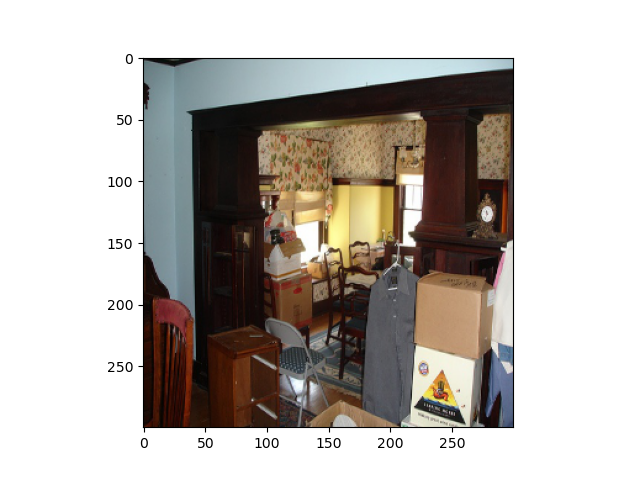

In [4]:
img, targets = dataset[0]

plt.figure()
plt.imshow(tensor2cvimg(img))

[38, 38] 1444 0


<IPython.core.display.Javascript object>


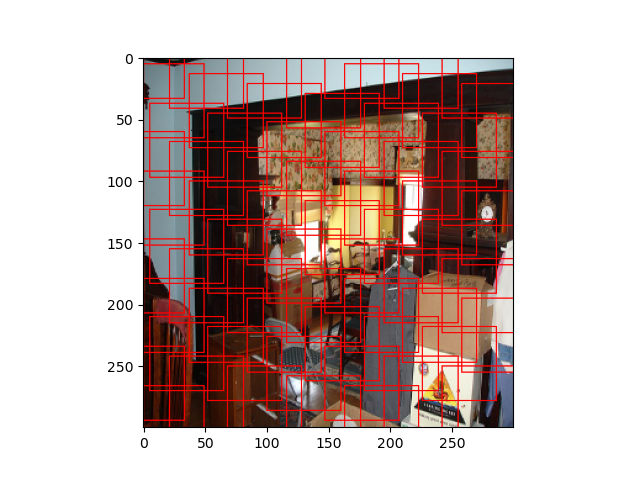

[19, 19] 361 1444


<IPython.core.display.Javascript object>


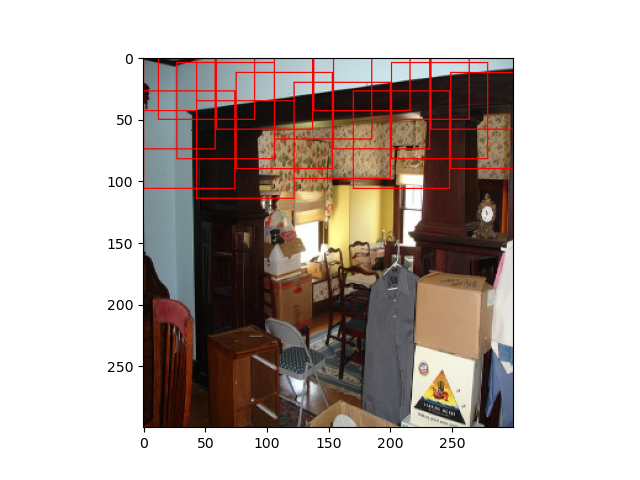

[10, 10] 100 1805


<IPython.core.display.Javascript object>


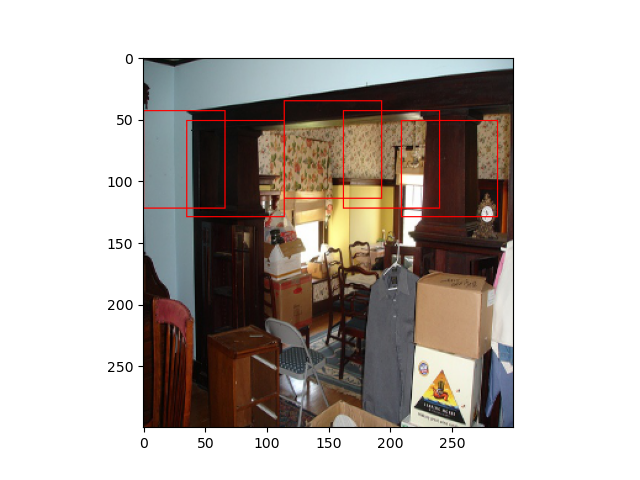

[5, 5] 25 1905


<IPython.core.display.Javascript object>


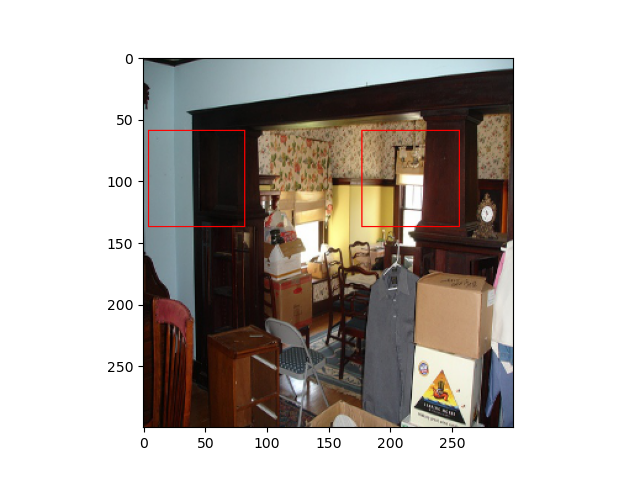

[3, 3] 9 1930


<IPython.core.display.Javascript object>


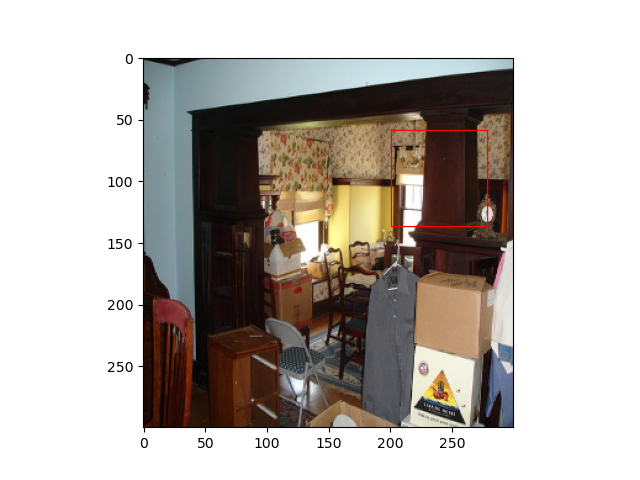

[1, 1] 1 1939


<IPython.core.display.Javascript object>


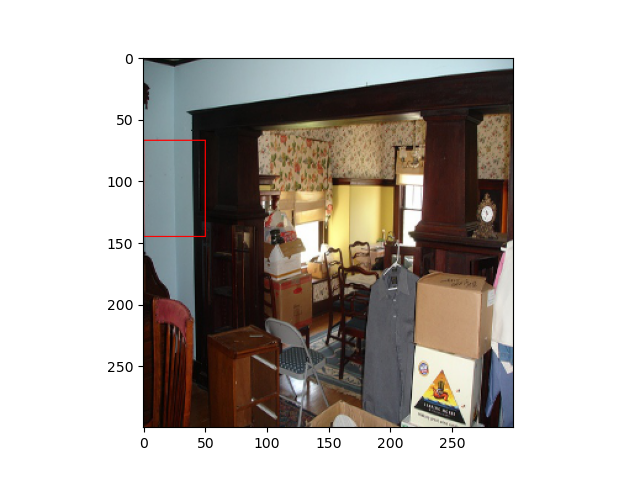

In [9]:
box_s = 0
for fmap_size, box_num in zip(defaultbox.fmap_sizes, defaultbox.boxes_num):
    print(fmap_size, box_num, box_s)
    #resized_img = cv2.resize(img, tuple(fmap_size))
    
    dboxes = defaultbox.dboxes
    
    #resized_img = box_show(resized_img, dboxes[58::1000])
    dbox_img = toVisualizeRectangleimg(img, dboxes[box_s:box_s+box_num:22], thickness=1)
    
    plt.figure()
    #plt.imshow(resized_img)
    plt.imshow(dbox_img)

    box_s += box_num

In [8]:
center2minmax(dboxes)[-1]*300

tensor([ 54.5406,   0.0000, 245.4594, 300.0000])